In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import pandas as pd

import mne
mne.set_log_level(False)

event_id_debener = {"standard":200, "target":100}
event_id_ingwer = {'viol/p6/ten':201,
             'ctrl/p6/ten':202,
             'viol/p6/sier':203,
             'ctrl/p6/sier':204,
             'viol/p6/ier':205,
             'ctrl/p6/ier':206,
             'inc/n4/svo':101,
             'con/n4/svo':102,
             'inc/n4/akk':103,
             'con/n4/akk':104,
             "button/accept":254,
             "button/noaccept":255,
             "?":253,
             }
event_id_n170 = {"stim/words":222, "stim/pics/fishes":223, "stim/pics/butterflies":221,
            "stim/pics/objects":225, "stim/pics/faces":231, "error":250,"fix":252}
event_ids = {"Debener":event_id_debener,
             "Ingwer":event_id_ingwer,
             "n170":event_id_n170}

item_trigs = {'Bauch': 86, 'Bier': 88, 'Blau': 93, 'Daumen': 85, 'Fisch': 77, 'Gelb': 94, 'Gesicht': 82, 'Knie': 83, 'Milch': 89, 'Panther': 81, 'Rot': 92, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5001.tif': 39, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5002.tif': 40, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5003.tif': 41, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5004.tif': 42, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5005.tif': 43, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5006.tif': 44, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5007.tif': 45, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5008.tif': 46, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5009.tif': 47, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5010.tif': 48, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5011.tif': 49, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5012.tif': 50, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5013.tif': 51, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5014.tif': 52, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5015.tif': 53, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5016.tif': 54, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5017.tif': 55, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5018.tif': 56, 'SHINE_OUTPUT_jona/butterflies/SHINEd_5019.tif': 57, 'SHINE_OUTPUT_jona/faces/SHINEd_05.tif': 1, 'SHINE_OUTPUT_jona/faces/SHINEd_06.tif': 2, 'SHINE_OUTPUT_jona/faces/SHINEd_07.tif': 3, 'SHINE_OUTPUT_jona/faces/SHINEd_08.tif': 4, 'SHINE_OUTPUT_jona/faces/SHINEd_09.tif': 5, 'SHINE_OUTPUT_jona/faces/SHINEd_10.tif': 6, 'SHINE_OUTPUT_jona/faces/SHINEd_11.tif': 7, 'SHINE_OUTPUT_jona/faces/SHINEd_13.tif': 8, 'SHINE_OUTPUT_jona/faces/SHINEd_14.tif': 9, 'SHINE_OUTPUT_jona/faces/SHINEd_15.tif': 10, 'SHINE_OUTPUT_jona/faces/SHINEd_34.tif': 11, 'SHINE_OUTPUT_jona/faces/SHINEd_35.tif': 12, 'SHINE_OUTPUT_jona/faces/SHINEd_36.tif': 13, 'SHINE_OUTPUT_jona/faces/SHINEd_39.tif': 14, 'SHINE_OUTPUT_jona/faces/SHINEd_46.tif': 15, 'SHINE_OUTPUT_jona/faces/SHINEd_47.tif': 16, 'SHINE_OUTPUT_jona/faces/SHINEd_49.tif': 17, 'SHINE_OUTPUT_jona/faces/SHINEd_50.tif': 18, 'SHINE_OUTPUT_jona/faces/SHINEd_60.tif': 19, 'SHINE_OUTPUT_jona/fishes/SHINEd_6001.tif': 58, 'SHINE_OUTPUT_jona/fishes/SHINEd_6002.tif': 59, 'SHINE_OUTPUT_jona/fishes/SHINEd_6003.tif': 60, 'SHINE_OUTPUT_jona/fishes/SHINEd_6004.tif': 61, 'SHINE_OUTPUT_jona/fishes/SHINEd_6005.tif': 62, 'SHINE_OUTPUT_jona/fishes/SHINEd_6006.tif': 63, 'SHINE_OUTPUT_jona/fishes/SHINEd_6007.tif': 64, 'SHINE_OUTPUT_jona/fishes/SHINEd_6008.tif': 65, 'SHINE_OUTPUT_jona/fishes/SHINEd_6009.tif': 66, 'SHINE_OUTPUT_jona/fishes/SHINEd_6010.tif': 67, 'SHINE_OUTPUT_jona/fishes/SHINEd_6011.tif': 68, 'SHINE_OUTPUT_jona/fishes/SHINEd_6012.tif': 69, 'SHINE_OUTPUT_jona/fishes/SHINEd_6013.tif': 70, 'SHINE_OUTPUT_jona/fishes/SHINEd_6014.tif': 71, 'SHINE_OUTPUT_jona/fishes/SHINEd_6015.tif': 72, 'SHINE_OUTPUT_jona/fishes/SHINEd_6016.tif': 73, 'SHINE_OUTPUT_jona/fishes/SHINEd_6017.tif': 74, 'SHINE_OUTPUT_jona/fishes/SHINEd_6018.tif': 75, 'SHINE_OUTPUT_jona/fishes/SHINEd_6019.tif': 76, 'SHINE_OUTPUT_jona/objects/SHINEd_10_11_morph25_rot0_light1.tif': 20, 'SHINE_OUTPUT_jona/objects/SHINEd_1_3_morph25_rot0_light1.tif': 21, 'SHINE_OUTPUT_jona/objects/SHINEd_1_4_morph25_rot0_light1.tif': 22, 'SHINE_OUTPUT_jona/objects/SHINEd_1_5_morph25_rot0_light1.tif': 23, 'SHINE_OUTPUT_jona/objects/SHINEd_1_6_morph25_rot0_light1.tif': 24, 'SHINE_OUTPUT_jona/objects/SHINEd_1_8_morph25_rot0_light1.tif': 25, 'SHINE_OUTPUT_jona/objects/SHINEd_2_11_morph25_rot0_light1.tif': 26, 'SHINE_OUTPUT_jona/objects/SHINEd_3_6_morph25_rot0_light1.tif': 27, 'SHINE_OUTPUT_jona/objects/SHINEd_3_9_morph25_rot0_light1.tif': 28, 'SHINE_OUTPUT_jona/objects/SHINEd_4_10_morph25_rot0_light1.tif': 29, 'SHINE_OUTPUT_jona/objects/SHINEd_4_5_morph25_rot0_light1.tif': 30, 'SHINE_OUTPUT_jona/objects/SHINEd_5_11_morph25_rot0_light1.tif': 31, 'SHINE_OUTPUT_jona/objects/SHINEd_5_6_morph25_rot0_light1.tif': 32, 'SHINE_OUTPUT_jona/objects/SHINEd_5_8_morph25_rot0_light1.tif': 33, 'SHINE_OUTPUT_jona/objects/SHINEd_6_7_morph25_rot0_light1.tif': 34, 'SHINE_OUTPUT_jona/objects/SHINEd_6_8_morph25_rot0_light1.tif': 35, 'SHINE_OUTPUT_jona/objects/SHINEd_7_11_morph25_rot0_light1.tif': 36, 'SHINE_OUTPUT_jona/objects/SHINEd_8_11_morph25_rot0_light1.tif': 37, 'SHINE_OUTPUT_jona/objects/SHINEd_9_12_morph25_rot0_light1.tif': 38, 'Saft': 90, 'Schlange': 80, 'Schmetterling': 78, 'Schulter': 84, 'Schwarz': 95, 'Tee': 91, 'Tiger': 79, 'Wein': 87}
#    send_trigger(item_trigs[stim] + (100 * repeat) if not training else 0)
#    win.callOnFlip(send_trigger, trigdict[cat] + (20 * repeat) if not training else 0)

critical_contrasts = {"Debener":["standard", "target"],
                      "Ingwer":("ctrl", "viol"),
                      "n170":("objects", "faces"),
                      "Ingwer_N4":("con", "inc")}

from os import listdir

In [146]:
sourceloc = "/home/jona/experiments/trifecta/"

names = {"_".join(name.split("/")[-1].split(".")[0].split("_")[1:])
         for name in listdir(sourceloc) if "vhdr" in name}
names_ = list(sorted(names))
names

{'ASD12', 'DKD17', 'JONA', 'MAA_24', 'NAD17', 'SHR_26'}

In [147]:
old = {'MAA_24', 'SHR_26', "NAD17", "JONA", "ASD12"}

In [148]:
montage = "/home/jona/tools/standard.elp"

in_template = sourceloc + "{}_{}.vhdr"
out_template = sourceloc + "{2}/{0}-{1}-{2}.fif"

exps = {"n170", "Debener", "Ingwer"} # topdown

def make_raw(name, exp):
    raw = mne.io.read_raw_brainvision(in_template.format(exp, name),
                                      montage=montage, preload=True)
    events = mne.find_events(raw, shortest_event=0)
    try:
        raw.filter(.1, 30, n_jobs='cuda')
        raw, events = raw.resample(200, npad='auto', n_jobs='cuda', events=events)
    except Exception:
        print("CUDA failed for " + name)
        raw.filter(.1, 30, n_jobs=-2)
        raw, events = raw.resample(200, npad='auto', n_jobs=-2, events=events)

    mne.io.add_reference_channels(raw, "FCz", copy=False)
    mne.io.set_eeg_reference(raw, ref_channels=None, copy=False)
    raw.apply_proj()
    m = mne.channels.montage.read_montage(montage)
    mne.channels.montage._set_montage(raw.info, m)
#    mne.io.set_eeg_reference(raw, ref_channels=["M1", "M2"], copy=False)
#    raw.drop_channels(["M1", "M2"])
    mne.write_events(out_template.format(name, exp, "eve"), events)
    raw.save(out_template.format(name, exp, "raw"), overwrite=True)

def make_ica(name):
    raws = [mne.io.read_raw_fif(out_template.format(
        name, exp, "raw"), preload=True).filter(1.5, 10, n_jobs=-2)
            for exp in exps]
    raw = mne.concatenate_raws(raws)
    ica = mne.preprocessing.ICA(n_components=40).fit(raw)
    ica.save(out_template.format(name, "all", "ica"))

In [149]:
for name in names:
    if name not in old:
        print(name)
        for exp in exps:
            make_raw(name, exp)
        make_ica(name)

DKD17
Online software filter detected. Using software filter settings and ignoring hardware values
Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.


<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
  montage=montage, preload=True)


Online software filter detected. Using software filter settings and ignoring hardware values
Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.


<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
  montage=montage, preload=True)


Online software filter detected. Using software filter settings and ignoring hardware values
Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.


<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  montage=montage, preload=True)
<ipython-input-148-c19cfa712b84>:10: RuntimeWarning: Currently, 1 trigger(s) will be dropped, such as [actiCAP Data On]. Consider using ``event_id`` to parse triggers that do not follow the 'S###' pattern.
  montage=montage, preload=True)


In [874]:
blinks = [ 1.70854872e+00, 1.78611111e+00, 4.64995488e-01, 4.28375120e-01, 3.73103798e-01, 4.10475711e-01, 2.79846039e-01, 1.27330706e-01, 8.54690468e-02, 8.14568532e-02, 1.49118375e-02, -1.03658554e-01, -3.51294693e-02, -6.28710221e-02, -7.88226182e-02, -2.74432660e-01, -4.66473288e-01, -1.62168500e-01, -1.43400233e-01, -1.52671396e-01, -2.02746459e-01, -5.08072058e-01, -2.91246330e-01, -2.23955726e-01, -2.25301999e-01, -2.47723150e-01, -3.40615027e-01, -4.06851712e-01, -3.54618041e-01, -3.68309993e-01, -3.69659371e-01, -4.56878328e-01, 1.26390183e+00, 9.61113773e-01, 9.62751672e-01, 1.08546616e+00, 5.28461851e-01, 3.55077638e-01, 3.60140854e-01, 4.00458951e-01, -1.39036228e+00, 6.23026071e-02, 1.05373849e-01, 8.18107486e-02, -7.05772316e-02, -1.34963754e+00, -6.90535424e-02, -5.11604124e-02, -6.03022876e-02, -1.10961027e-01, -2.13940904e-01, -1.31895646e-01, -1.51789402e-01, -1.62428096e-01, -2.95903499e-01, -2.43029195e-01, -2.03856383e-01, -2.13886099e-01, -2.81339511e-01, -3.15508740e-01, -2.87903671e-01, -2.97896997e-01, -2.93983428e-01, -3.43662211e-01, 8.71996763e-02]
vertical = [ 1.16700431e-01, 2.46128961e-01, 1.04343453e-01, 6.38133064e-03, 4.66199734e-02, 2.29162548e-02, 1.29765167e-01, -5.10486355e-02, -2.83145255e-02, -6.06051661e-02, -9.48583097e-02, -9.86331723e-03, -6.55435861e-02, -8.62428542e-02, -8.05711666e-02, 2.00095223e-01, -7.37752865e-02, -6.90404910e-02, 2.36138840e-02, -2.35413423e-02, -2.08340221e-01, -1.03948601e-01, -5.25392121e-02, -9.82874816e-02, -1.03621457e-01, -7.51653691e-02, -4.43094212e-01, -1.74211371e-01, -1.71473498e-01, 1.29044529e-02, -3.24525317e-01, -1.13204170e-01, 3.21988394e-01, 3.51222448e-01, 1.68380522e-01, 1.10067203e-01, 7.21571088e-03, 1.19825896e-03, -3.25276285e-02, 2.60123384e-02, 1.04127802e+00, 7.00242159e-03, -7.15435426e-02, -6.32360721e-02, 1.40901526e-02, 1.37121996e+00, -7.46559225e-02, -4.65400456e-02, -5.75951125e-02, -6.20096872e-02, -2.24701710e-02, -1.47176816e-01, -4.90253330e-02, -1.53113243e-01, -4.93652206e-02, -2.61296455e-02, -4.23947074e-02, -2.46594775e-01, -7.30787853e-02, -1.50581298e-01, -1.61187713e-01, 2.53165555e-03, -5.74907109e-02, -1.71760428e-01, -6.13837715e-02]
saccades = [ 1.67084331e-01, -3.30856970e-01, 4.53675758e-01, 1.70185165e-01, -1.60627159e-03, -1.85173384e-01, -5.59929750e-01, 2.64528765e-01, 4.86752730e-02, -7.03229402e-02, -2.91893195e-01, 2.20494716e-01, 1.15239330e-01, -2.99174815e-03, -1.09352164e-01, -2.42295019e-01, 1.75938139e-01, 1.31036217e-01, 3.20345878e-02, -2.27307865e-02, -9.73597704e-02, -9.00980924e-02, 5.06652732e-02, 5.07397444e-02, 2.72122582e-02, -1.60502435e-02, -6.42595238e-02, 6.57155395e-02, -1.44974344e-02, 3.17234369e-02, 1.91128946e-02, 2.81397056e-02, 4.26648354e-01, 1.16510200e-01, -2.22623578e-01, -5.49734114e-01, 2.94520391e-01, 6.47983190e-02, -8.59745540e-02, -3.59916669e-01, 4.90639911e-01, 3.53108816e-01, 1.43529556e-01, -1.64994260e-01, -3.89423547e-01, -2.85288045e-01, 1.84927024e-01, 3.83730558e-02, -4.63678308e-02, -2.05378650e-01, 1.56628517e-01, 6.66012289e-02, 1.39855287e-02, -6.80030567e-02, -1.23072506e-01, 6.10660283e-02, 3.43124511e-02, -1.62163489e-03, -2.13087651e-02, 5.91479209e-02, 2.93870836e-02, 2.02526692e-02, 2.28664944e-02, -7.28650569e-04, -5.65153027e-03]

artefacts = dict(blinks=blinks, vertical=vertical, saccades=saccades)

In [1294]:
icas = [mne.preprocessing.read_ica(out_template.format(name, "all", "ica")) for name in names]

In [1295]:
ica = mne.preprocessing.read_ica(out_template.format(name, "all", "ica"))

In [150]:
from autoreject import LocalAutoRejectCV
import pickle

for name in names:
    if name not in old:
        print(name)
        for exp in exps:
            epochs = make_epochs(name, "n170")
            ar = LocalAutoRejectCV()
            epochs_clean = ar.fit_transform(epochs.pick_types(eeg=True))
            with open(sourceloc + "ar/" + "-".join((name, exp, "ar.pckl")), 'wb') as f:
                pickle.dump(ar, f)

DKD17
AR failed:  [Errno 2] No such file or directory: '/home/jona/experiments/trifecta/ar/DKD17-n170-ar.pckl'
[........................................] 100.00000 - n_interp   pochs   s   hs   Estimated consensus_perc=0.20 and n_interpolate=1
[........................................] 100.00000 - n_interp   pochs   s   hs   Estimated consensus_perc=0.50 and n_interpolate=1
[........................................] 100.00000 - n_interp   pochs   s   hs   Estimated consensus_perc=0.30 and n_interpolate=1
[........................................] 100.00000 \ Repairing epochs   

In [680]:
for artefact_type, template in artefacts.items():
    mne.preprocessing.ica.corrmap(icas, np.asarray(template), label=artefact_type, threshold=.85)

In [ ]:
# Following lines are for manual correction of CORRMAP

In [151]:
name = "DKD17"
fname = out_template.format(name, exp, '{0}')
ica = mne.preprocessing.read_ica(fname.format("ica").replace(exp, "all"))

In [179]:
#ica.plot_components();

In [153]:
ica.exclude = [0, 1, 2, 5, 6, 7]
ica.save(fname.format("ica").replace(exp, "all"))

<ICA  |  raw data decomposition, fit (fastica): 954092 samples, 40 components, channels used: "eeg", 6 sources marked for exclusion>

In [171]:
tmax_dict = {"Ingwer":1.2, "Ingwer_N4":.8, "Debener":.6, "n170":.3}

def make_epochs(name, exp, reref=True, ar=True):
    tmax = tmax_dict[exp]
    exp = exp.split("_")[0]
    fname = out_template.format(name, exp, '{0}')
    raw = mne.io.read_raw_fif(fname.format("raw")).load_data().filter(None, 30, n_jobs='cuda')
    ica = mne.preprocessing.read_ica(fname.format("ica").replace(exp, "all"))
    events = mne.read_events(fname.format("eve"))
    if exp == "Debener":
        events[:, 0] += 50
    
    epochs = mne.Epochs(raw, events=events, event_id=event_ids[exp],
                        preload=True, on_missing='ignore',
                        tmin=-.5, tmax=tmax).crop(tmin=-.1)
    
    ica.apply(epochs, exclude=ica.exclude)
    epochs = epochs.pick_types(eeg=True)

    if ar:
        try:
            with open('/home/jona/experiments/trifecta/ar/{}-{}-ar.pckl'.format(name, exp), 'rb') as f:
                epochs = pickle.load(f).transform(epochs)
        except Exception as e:
            print("AR failed: ", e)

    if reref:
        refchan = ["M1", "M2"]
        epochs.set_eeg_reference(refchan).apply_proj()
        epochs.drop_channels(refchan)

    return epochs

In [172]:
from mne.decoding import GeneralizationAcrossTime as GAT

from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

from functools import partial
scorer = partial(roc_auc_score, average="weighted")
scorer.__name__ = 'roc_auc_score'

clf = RidgeClassifier(alpha=1, class_weight="balanced")
clf = LogisticRegression(class_weight='balanced')
clf = make_pipeline(StandardScaler(), clf)

def make_gat(name):
    scores = {}
    clf_params = dict(n_jobs=5, clf=clf, predict_method="decision_function",
                      scorer=scorer, cv=StratifiedKFold(n_splits=5))

    ingw = make_epochs(name, "Ingwer")
    ingwer_epochs = ingw["p6"]
    ing_y = ingwer_epochs.events[:, 2] % 2
    gat_ing = GAT(**clf_params).fit(ingwer_epochs, ing_y)
    scores["ingwer"] = gat_ing.score(ingwer_epochs, ing_y)

    ingwer_n4 = ingw["n4"]
    ing_y_n4 = ingwer_n4.events[:, 2] % 2
    gat_ing_n4 = GAT(**clf_params).fit(ingwer_n4, ing_y_n4)
    scores["ingwer_n4"] = gat_ing_n4.score(ingwer_n4, ing_y_n4)    

    n170_epochs = make_epochs(name, "n170")
    n170_epochs = mne.concatenate_epochs((n170_epochs["objects"], n170_epochs["faces"]))
    n170_y = (n170_epochs.events[:, -1] == 231).astype(int)
    gat_n170 = GAT(**clf_params).fit(n170_epochs, n170_y)
    scores["n170"] = gat_n170.score(n170_epochs, n170_y);

    debener_epochs = make_epochs(name, "Debener")
    debener_y = (debener_epochs.events[:, -1] == 100).astype(int)
    gat_debener = GAT(**clf_params).fit(debener_epochs, debener_y)
    scores["debener"] = gat_debener.score(debener_epochs, debener_y);

    gat_ing_n4.predict_mode = gat_n170.predict_mode = gat_debener.predict_mode = "mean-prediction"
    gat_debener.score(ingwer_epochs, ing_y)
    gat_n170.score(ingwer_epochs, ing_y)
    gat_ing_n4.score(ingwer_epochs, ing_y)

    return scores, gat_ing, gat_debener, gat_n170, gat_ing_n4

In [ ]:
df = pd.DataFrame()
all_evokeds = {exp:{cond:list() for cond in critical_contrasts[exp]} for exp in critical_contrasts}

for name in sorted(names):
#    if name not in old:
        for exp in critical_contrasts:
            ep = make_epochs(name, exp, reref=exp is not "n170"
                            )
            for cond in critical_contrasts[exp]:
                df.loc[name, cond] = len(ep[cond])
                all_evokeds[exp][cond].append(ep[cond].average())

[........................................] 100.00000 \ Repairing epochs   

In [197]:
df

,con,inc,objects,faces,standard,target,ctrl,viol
ASD12,80.0,80.0,170.0,167.0,792.0,100.0,79.0,77.0
DKD17,80.0,80.0,175.0,177.0,843.0,91.0,80.0,80.0
JONA,80.0,80.0,181.0,176.0,812.0,94.0,80.0,80.0
MAA_24,56.0,56.0,180.0,180.0,800.0,104.0,56.0,56.0
NAD17,55.0,44.0,68.0,69.0,804.0,102.0,57.0,40.0
SHR_26,44.0,44.0,180.0,178.0,806.0,91.0,44.0,44.0


In [198]:
time_dict = {"Debener":[.2, .3, .4], "Ingwer":.8, "n170":.17, "Ingwer_N4":[.425, .8]}

for cond in []:#("n170", "Debener", "Ingwer", "Ingwer_N4"):
    mne.combine_evoked([evs[ind] for evs in all_evokeds[cond].values()],
                       (-.5, .5) if cond != "Ingwer_N4" else (.5, -.5)
                      ).plot_joint(
        title=cond, times=time_dict[cond])

In [214]:
tmax_dict

{'Debener': 0.6, 'Ingwer': 1.2, 'Ingwer_N4': 0.8, 'n170': 0.3}

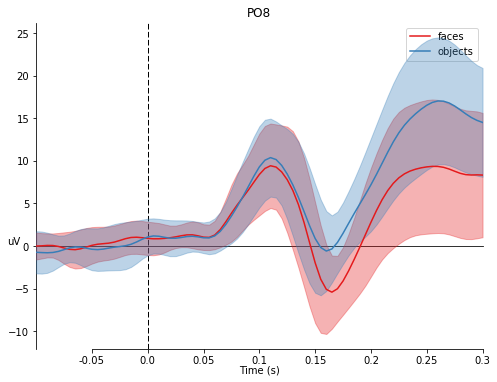

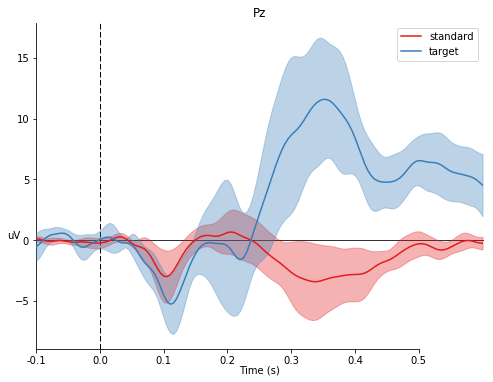

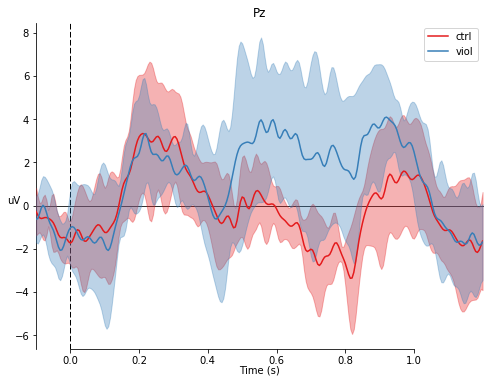

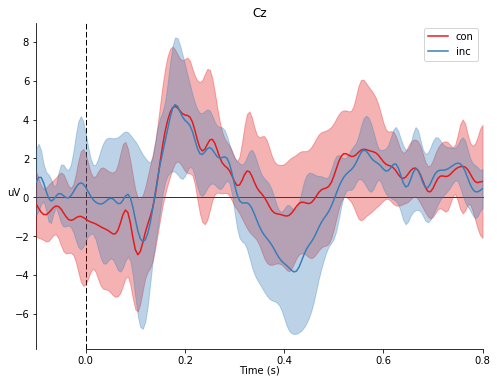

In [199]:
ev = all_evokeds["n170"]["faces"][0]
picks = ev.ch_names.index("PO8")
mne.viz.plot_compare_evokeds(all_evokeds["n170"], picks=picks);

ev = all_evokeds["Debener"]["target"][0]
picks = ev.ch_names.index("Pz")

mne.viz.plot_compare_evokeds(all_evokeds["Debener"], picks=picks);
mne.viz.plot_compare_evokeds(all_evokeds["Ingwer"], picks=picks);

picks = ev.ch_names.index("Cz")
mne.viz.plot_compare_evokeds(all_evokeds["Ingwer_N4"], picks=picks);

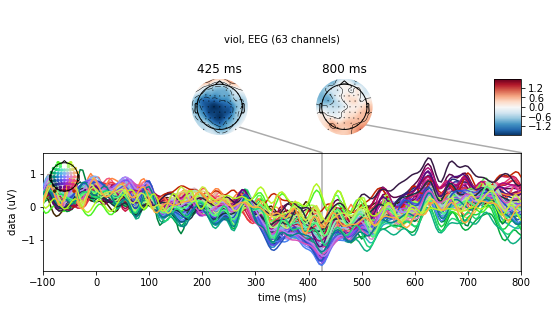

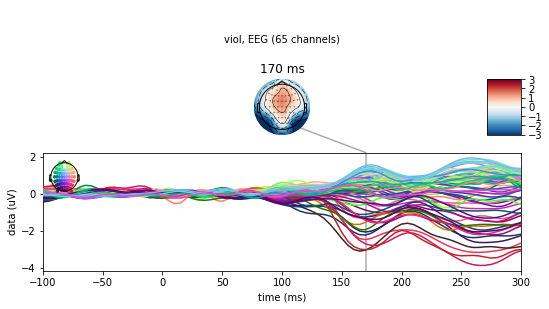

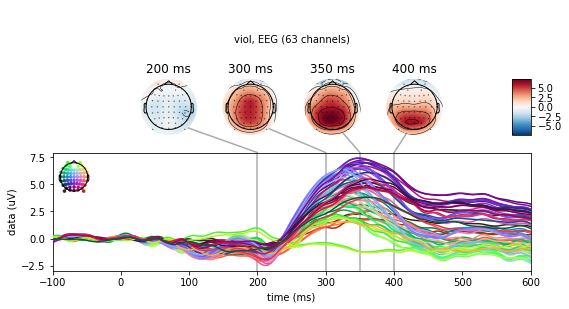

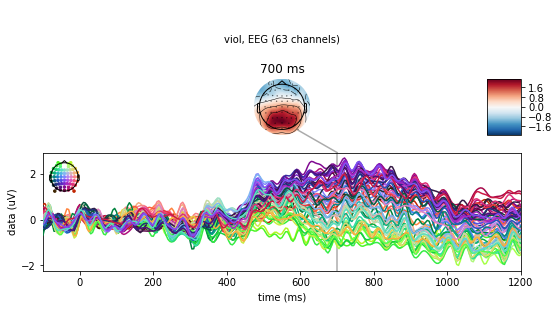

In [200]:
time_dict = {"Debener":[.2, .3, .35, .4], "Ingwer":[.7], "n170":.17, "Ingwer_N4":[.425, .8]}

for exp, erps in all_evokeds.items():
    mne.combine_evoked([mne.grand_average(erps[k]) for k in critical_contrasts[exp]],
                       (-.5, .5)
                      ).plot_joint(
        title=cond, times=time_dict[exp])

In [ ]:
res = [make_gat(name) for name in sorted(names)]

In [192]:
exps_gat = {exp:list() for exp in critical_contrasts}
for res_ in res:
    _, gat_ing, gat_debener, gat_n170, gat_ing_n4 = res_
    exps_gat["Debener"].append(gat_debener)
    exps_gat["n170"].append(gat_n170)
    exps_gat["Ingwer"].append(gat_ing)
    exps_gat["Ingwer_N4"].append(gat_ing_n4)

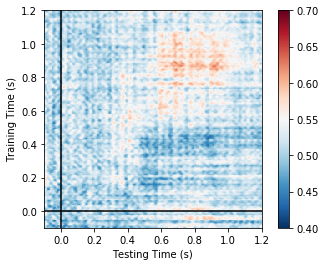

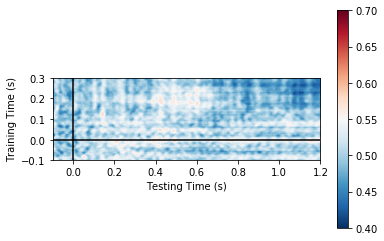

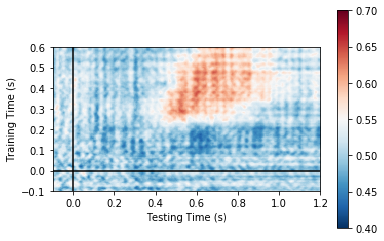

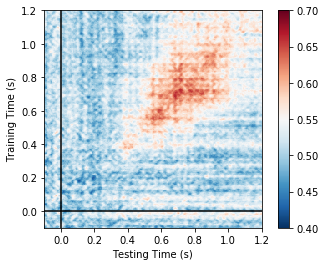

In [193]:
import numpy as np
from copy import deepcopy

for exp, gats in exps_gat.items():
    dummy_gat = deepcopy(gats[0])
    scores = np.asarray([gat.scores_ for gat in gats]).mean(0)
    dummy_gat.scores_ = scores
    dummy_gat.plot(vmin=.4, vmax=.7)

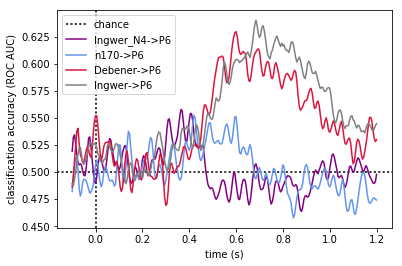

In [222]:
import numpy as np
from copy import deepcopy

time_dict = {"Debener":.4, "Ingwer":.7, "n170":.17, "Ingwer_N4":.4}
color_dict = {"Debener":"crimson", "n170":"cornflowerblue", "Ingwer":'grey', "Ingwer_N4":'purple'}

name = "JONA"
times = list(make_epochs(name, "Ingwer", ar=False).times)

plt.axhline(.5, color="k", linestyle=":", label="chance")
plt.axvline(0, color="k", linestyle=":")
ax = plt.gca()

for exp, gats in exps_gat.items():
    scores = np.asarray([gat.scores_ for gat in gats])
    epochs = make_epochs(name, exp, ar=False)
    t = list(epochs.times).index(time_dict[exp])
    s = np.asarray([gat.scores_ for gat, name in
                    zip(gats, sorted(names))])[:, t-10:t+10, :].mean(0).mean(0)
    ax.plot(times, s, label="{}->P6".format(exp), c=color_dict[exp])
plt.legend(loc=0)

ax.set_ylabel("classification accuracy (ROC AUC)")
ax.set_xlabel("time (s)")

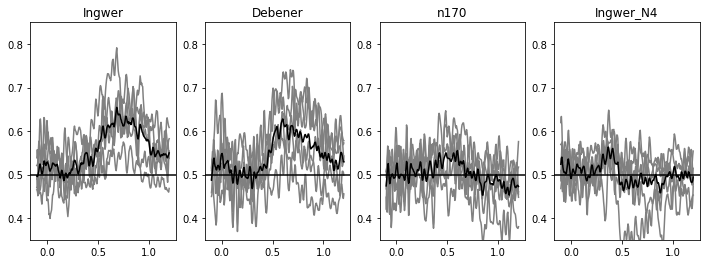

In [223]:
mean_accuracies = dict()
f, axes = plt.subplots(ncols=4)
f.set_size_inches((12, 4))

for ax, exp in zip(axes, ["Ingwer", "Debener", "n170", "Ingwer_N4"]):
    gats = exps_gat[exp]
    scores = np.asarray([gat.scores_ for gat in gats])
    epochs = make_epochs(name, exp, ar=False)
    t = list(epochs.times).index(time_dict[exp])
    s = np.asarray([gat.scores_ for gat in gats])[:, t-5:t+5, :].mean(1)
    ax.plot(times, s.T, c='grey')
    ax.plot(times, s.mean(0), c='k')
    ax.set_title(exp)
    ax.axhline(.5, c='k')
    mean_accuracies[exp] = s[:, times.index(.6):times.index(.8)].mean(-1)
    ax.set_ylim(.35, .85)

In [224]:
from scipy.stats import wilcoxon

p = wilcoxon(mean_accuracies["Debener"]-.5)[-1]
msg = ("Cross-experiment decoding from the P3 peak to the P600 time window"
       "was {0}succesfull. p < {1:1.5f}.").format("not " if p > 0.1 else "", p)  # one-sided
print(msg)

p = wilcoxon(mean_accuracies["Debener"], mean_accuracies["n170"])[-1]
msg = "This was {0}better than cross-decoding from N170 to P600 (p < {1:1.5f})."
print(msg.format("not " if p > 0.1 else "", p))  # one-sided

p = wilcoxon(mean_accuracies["Debener"], mean_accuracies["Ingwer_N4"])[-1]
msg = "This was {0}better than cross-decoding from N400 to P600 (p < {1:1.5f})."
print(msg.format("not " if p > 0.1 else "", p))  # one-sided



Cross-experiment decoding from the P3 peak to the P600 time windowwas succesfull. p < 0.04640.
This was better than cross-decoding from N170 to P600 (p < 0.04640).
This was better than cross-decoding from N400 to P600 (p < 0.02771).


/home/jona/anaconda3/lib/python3.5/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
